In [1]:
import pandas as pd
import numpy as np
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import os
config = dotenv_values(find_dotenv())
path_cleandata = os.path.abspath(config["CLEANDATA"]) + '\\'
path_figures = os.path.abspath(config["FIGURES"]) + '\\'

In [2]:
# import my merged data
data = pd.read_pickle(path_cleandata + 'BEA6_IOuse_merged.pkl')


In [3]:
# filter for the year 2017 
data2017 = data[data['date'].dt.year == 2017]

In [4]:
# personal consumption expenditures
data2017 = data2017[data2017['product_O'].str.contains('Personal consumption expenditures')][['product_I', 'date', 'IO_value', 'expenditures_I']]

In [5]:
data2017[data2017['product_I'].str.contains('Audio discs')]

,product_I,date,IO_value,expenditures_I
119631,"Audio discs, tapes, vi...",2017-01-31,48836.0,3487.0
119632,"Audio discs, tapes, vi...",2017-04-30,48836.0,3685.0
119633,"Audio discs, tapes, vi...",2017-07-31,48836.0,3512.0
119634,"Audio discs, tapes, vi...",2017-10-31,48836.0,3149.0


In [6]:
# sum by product for that year
# first groupby: take sum of IO_value and mean of expenditures_I by date and product
byproduct = data2017.groupby(['product_I']).agg({
    'IO_value': 'mean',
    'expenditures_I': 'sum'}, min_count=1).reset_index()


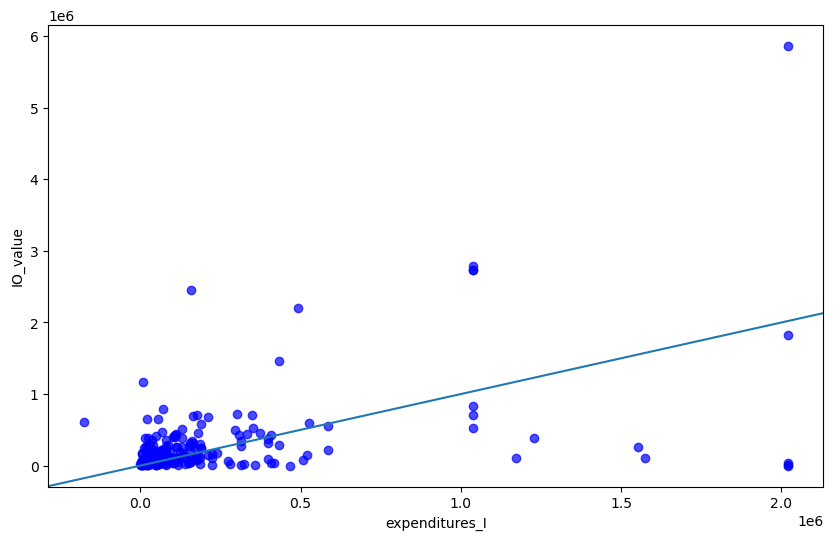

In [10]:
# do the scatter plot with expenditures on the x axis

plt.figure(figsize=(10, 6))
plt.scatter( byproduct['IO_value'], byproduct['expenditures_I'], c='blue', alpha=0.7)

plt.xlabel('expenditures_I')
plt.ylabel('IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\expenditures.pdf')

c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


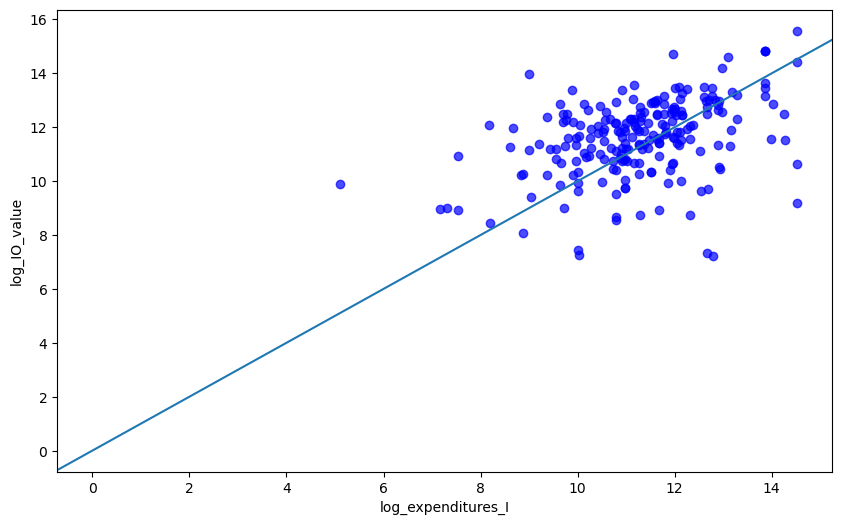

In [11]:
# get logs of everything and do an equivalent scatter plot with those

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct['IO_value']), np.log(byproduct['expenditures_I']), c='blue', alpha=0.7)

plt.xlabel('log_expenditures_I')
plt.ylabel('log_IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures.pdf')
